# Practical Lab - 3 : 
# Vanilla CNN and Fine-Tune VGG16 - for Dogs and Cats Classification
## Submitted by - Athul Raj
## Student ID - 8955725

## **Introduction**

* ### **Loading dataset**

In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the dataset paths
train_dir = "C:/Users/athul/Documents/aiml2024/CSCN8010-labs/train/train"
test_dir = "C:/Users/athul/Documents/aiml2024/CSCN8010-labs/test/test"

# Verify dataset structure
print("Verifying train and test directories...")
assert os.path.exists(train_dir), f"Train directory not found at {train_dir}"
assert os.path.exists(test_dir), f"Test directory not found at {test_dir}"

# List the contents of the directories
print("\nSample training files:")
train_samples = os.listdir(train_dir)[:10]
print(train_samples)

print("\nSample test files:")
test_samples = os.listdir(test_dir)[:10]
print(test_samples)


Verifying train and test directories...

Sample training files:
['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg']

Sample test files:
['1.jpg', '10.jpg', '100.jpg', '1000.jpg', '10000.jpg', '10001.jpg', '10002.jpg', '10003.jpg', '10004.jpg', '10005.jpg']


## **Exploratory Data Analysis**
* ### **Dataset summary**

Class Distribution in Training Data:
cat: 12500 images
dog: 12500 images


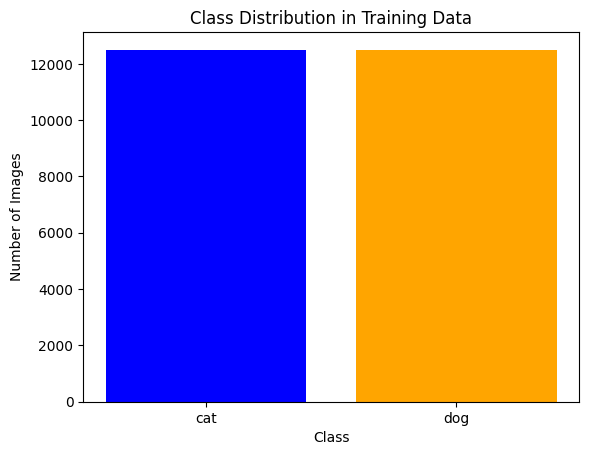

In [3]:
from collections import Counter
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Count the number of images in each class
class_counts = Counter([fname.split('.')[0] for fname in os.listdir(train_dir)])
print("Class Distribution in Training Data:")
for cls, count in class_counts.items():
    print(f"{cls}: {count} images")

# Plot class distribution
plt.bar(class_counts.keys(), class_counts.values(), color=['blue', 'orange'])
plt.title("Class Distribution in Training Data")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()


* ### **Visualising sample images**

Displaying 5 random images from class 'cat'


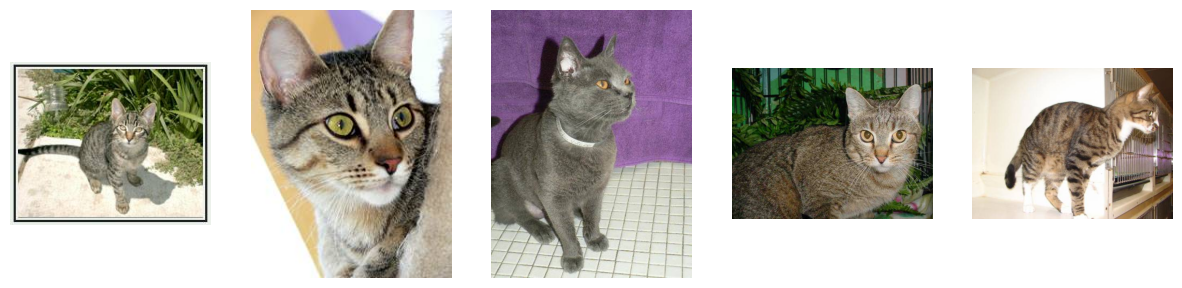

Displaying 5 random images from class 'dog'


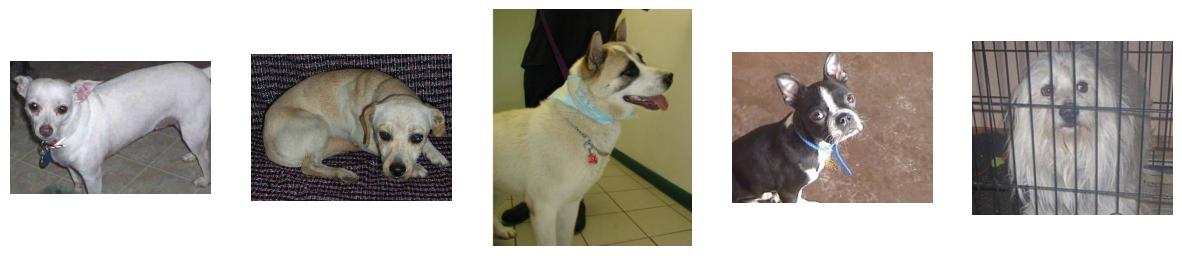

In [5]:
import cv2
import numpy as np

# Display a few random images from the training dataset
def display_sample_images(folder_path, class_name, n=5):
    print(f"Displaying {n} random images from class '{class_name}'")
    class_files = [f for f in os.listdir(folder_path) if f.startswith(class_name)]
    sample_files = np.random.choice(class_files, n, replace=False)
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    for i, file in enumerate(sample_files):
        img = cv2.imread(os.path.join(folder_path, file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        axes[i].imshow(img)
        axes[i].axis("off")
    plt.show()

# Display samples for cats and dogs
display_sample_images(train_dir, "cat", n=5)
display_sample_images(train_dir, "dog", n=5)


In [7]:
from PIL import Image
import os
from collections import Counter

# Function to check image dimensions
def check_image_dimensions(folder_path):
    dimensions = []
    for filename in os.listdir(folder_path):
        if filename.endswith((".jpg", ".png")):  # Filter for image files
            img_path = os.path.join(folder_path, filename)
            with Image.open(img_path) as img:
                dimensions.append(img.size)  # Collect width and height
    return Counter(dimensions)

# Set paths
train_dir = "C:/Users/athul/Documents/aiml2024/CSCN8010-labs/train/train"
test_dir = "C:/Users/athul/Documents/aiml2024/CSCN8010-labs/test/test"

# Check dimensions for the train folder
print("Checking training data dimensions...")
train_dimensions_count = check_image_dimensions(train_dir)

# Check dimensions for the test folder
print("Checking test data dimensions...")
test_dimensions_count = check_image_dimensions(test_dir)

# Print results for training data
print("\nUnique image dimensions in the training data:")
for dim, count in train_dimensions_count.items():
    print(f"{dim}: {count} images")

# Print results for test data
print("\nUnique image dimensions in the test data:")
for dim, count in test_dimensions_count.items():
    print(f"{dim}: {count} images")


Checking training data dimensions...
Checking test data dimensions...

Unique image dimensions in the training data:
(500, 374): 2955 images
(300, 280): 1 images
(489, 499): 15 images
(403, 499): 4 images
(150, 149): 14 images
(431, 359): 1 images
(499, 471): 11 images
(499, 375): 2912 images
(320, 239): 192 images
(319, 177): 1 images
(460, 320): 1 images
(219, 300): 1 images
(472, 500): 7 images
(336, 499): 10 images
(499, 386): 7 images
(357, 448): 1 images
(250, 166): 1 images
(372, 500): 9 images
(500, 339): 10 images
(179, 198): 1 images
(500, 280): 6 images
(499, 454): 10 images
(246, 301): 1 images
(379, 407): 1 images
(320, 423): 1 images
(423, 417): 2 images
(500, 448): 11 images
(349, 336): 2 images
(325, 431): 1 images
(153, 251): 1 images
(400, 491): 1 images
(500, 332): 200 images
(180, 134): 5 images
(385, 500): 11 images
(259, 269): 2 images
(500, 462): 4 images
(159, 120): 9 images
(500, 390): 10 images
(356, 391): 1 images
(300, 263): 1 images
(434, 276): 1 images
(29

## **Data preprocessing**

* ### **Resizing the images**:
Since the images are in different dimensions they need to resized and processed

In [8]:
import os
from PIL import Image

# Function to resize images and save them to a new directory
def resize_images(source_dir, target_dir, size=(224, 224)):
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)
    for filename in os.listdir(source_dir):
        if filename.endswith((".jpg", ".png")):  # Process image files only
            img_path = os.path.join(source_dir, filename)
            with Image.open(img_path) as img:
                img_resized = img.resize(size)
                img_resized.save(os.path.join(target_dir, filename))
    print(f"Resized images saved to: {target_dir}")

# Paths for resized images
train_resized_dir = "C:/Users/athul/Documents/aiml2024/CSCN8010-labs/train_resized"
test_resized_dir = "C:/Users/athul/Documents/aiml2024/CSCN8010-labs/test_resized"

# Resize training images
resize_images(train_dir, train_resized_dir)

# Resize testing images
resize_images(test_dir, test_resized_dir)


Resized images saved to: C:/Users/athul/Documents/aiml2024/CSCN8010-labs/train_resized
Resized images saved to: C:/Users/athul/Documents/aiml2024/CSCN8010-labs/test_resized


* ### **Working on the resized images**


In [57]:
from PIL import Image
import os

# Function to verify dimensions of resized images
def verify_resized_images(folder_path, target_size=(224, 224)):
    mismatched_images = []
    for filename in os.listdir(folder_path):
        if filename.endswith((".jpg", ".png")):
            img_path = os.path.join(folder_path, filename)
            with Image.open(img_path) as img:
                if img.size != target_size:
                    mismatched_images.append(filename)
    return mismatched_images

# Verify resized training images
train_resized_dir = "C:/Users/athul/Documents/aiml2024/CSCN8010-labs/train_resized"
test_resized_dir = "C:/Users/athul/Documents/aiml2024/CSCN8010-labs/test_resized"

print("Verifying resized training images...")
mismatched_train = verify_resized_images(train_resized_dir)
print(f"Mismatched training images: {len(mismatched_train)}")

print("Verifying resized test images...")
mismatched_test = verify_resized_images(test_resized_dir)
print(f"Mismatched test images: {len(mismatched_test)}")


Verifying resized training images...
Mismatched training images: 0
Verifying resized test images...
Mismatched test images: 0


* ### **Visualising resized images**

Displaying resized training images...


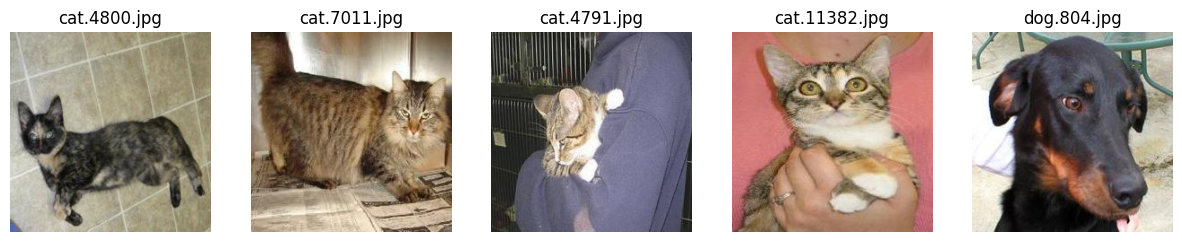

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Function to display sample images from a folder
def display_images(folder_path, n=5):
    files = [f for f in os.listdir(folder_path) if f.endswith((".jpg", ".png"))]
    sample_files = np.random.choice(files, n, replace=False)
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    for i, file in enumerate(sample_files):
        img_path = os.path.join(folder_path, file)
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].axis("off")
        axes[i].set_title(file)
    plt.show()

# Display 5 random images from resized training data
print("Displaying resized training images...")
display_images(train_resized_dir, n=5)


* ### **Class distribution**: 
Checking the labels of the images as labelled

In [11]:
# Function to count class distribution
def class_distribution(folder_path):
    class_counts = {"cats": 0, "dogs": 0}
    for filename in os.listdir(folder_path):
        if filename.startswith("cat"):
            class_counts["cats"] += 1
        elif filename.startswith("dog"):
            class_counts["dogs"] += 1
    return class_counts

# Get class distribution for resized training data
print("Class distribution in resized training data:")
train_class_counts = class_distribution(train_resized_dir)
print(train_class_counts)


Class distribution in resized training data:
{'cats': 12500, 'dogs': 12500}


* Saving to new file, with the subcategories

In [20]:
import os
import shutil

# Define paths
train_resized_dir = "C:/Users/athul/Documents/aiml2024/CSCN8010-labs/train_resized"

# Check if subdirectories exist
cat_dir = os.path.join(train_resized_dir, 'cat')
dog_dir = os.path.join(train_resized_dir, 'dog')

if not os.path.exists(cat_dir):
    os.makedirs(cat_dir)
if not os.path.exists(dog_dir):
    os.makedirs(dog_dir)

# Move files into respective folders
for filename in os.listdir(train_resized_dir):
    filepath = os.path.join(train_resized_dir, filename)
    # Skip directories
    if os.path.isdir(filepath):
        continue
    if filename.startswith('cat'):
        shutil.move(filepath, os.path.join(cat_dir, filename))
    elif filename.startswith('dog'):
        shutil.move(filepath, os.path.join(dog_dir, filename))

print("Files have been successfully organized into subdirectories.")


Files have been successfully organized into subdirectories.


## **Modelling**
* ### **Building a custom neural network**

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directories for resized images
train_resized_dir = "C:/Users/athul/Documents/aiml2024/CSCN8010-labs/train_resized"
test_resized_dir = "C:/Users/athul/Documents/aiml2024/CSCN8010-labs/test_resized"

# Define image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Create ImageDataGenerator for training and validation
datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    validation_split=0.2  # Split training data: 80% train, 20% validation
)

# Create training data generator
train_generator = datagen.flow_from_directory(
    train_resized_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Binary classification: cats (0) and dogs (1)
    subset='training'  # Training data split
)

# Create validation data generator
validation_generator = datagen.flow_from_directory(
    train_resized_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'  # Validation data split
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


* ### **Training the model**

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5465 - loss: 0.7285
Epoch 1: val_loss improved from inf to 0.60845, saving model to custom_cnn_best_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 60873s 98s/step - accuracy: 0.5466 - loss: 0.7284 - val_accuracy: 0.6860 - val_loss: 0.6084
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7010 - loss: 0.5863
Epoch 2: val_loss improved from 0.60845 to 0.51095, saving model to custom_cnn_best_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 729s 1s/step - accuracy: 0.7010 - loss: 0.5863 - val_accuracy: 0.7536 - val_loss: 0.5109
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7616 - loss: 0.4910
Epoch 3: val_loss improved from 0.51095 to 0.45664, saving model to custom_cnn_best_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 691s 1s/step - accuracy: 0.7617 - loss: 0.4910 - val_accuracy: 0.7838 - val_loss: 0.4566
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 827ms/step - accuracy: 0.8173 - loss: 0.4074
Epoch 4: val_los

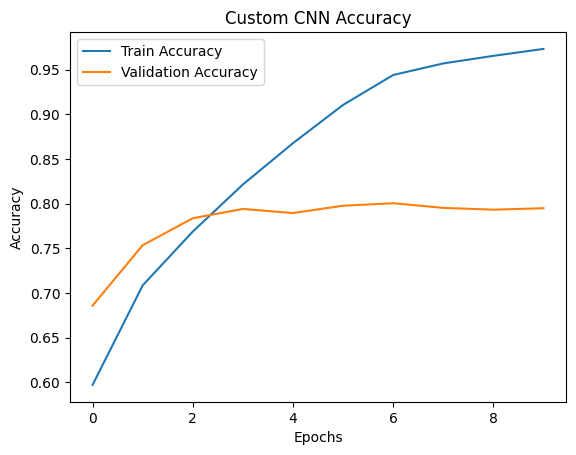

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Define the CNN model
def create_custom_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

# Create the model
custom_cnn = create_custom_cnn()

# Compile the model
custom_cnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Set up a callback to save the best model in .keras format
checkpoint_cnn = ModelCheckpoint(
    "custom_cnn_best_model.keras",  # Updated file extension
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)


# Train the model
history_cnn = custom_cnn.fit(
    train_generator,  # From resized training dataset
    validation_data=validation_generator,
    epochs=10,
    callbacks=[checkpoint_cnn]
)

# Plot training history
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Custom CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


* ### Performance analysis
* Validation Loss Trend:
1. Best Validation Loss: 0.45664 (achieved at Epoch 3).
2. After Epoch 3, validation loss worsens, indicating that the model is unable to improve on unseen data despite continued improvements in training accuracy.

* Insights from the Training Process:
1. Early Stopping Point: Based on the validation loss trend, the model's training could have been stopped at Epoch 3. This would help mitigate overfitting and save computational resources.
2. Overfitting Evidence:
   * Validation accuracy stagnates while training accuracy increases steadily.
   * Validation loss begins increasing after Epoch 3, further signaling overfitting.

- While the Custom CNN performs well on the training data, it struggles to maintain performance on the validation dataset, a key metric for assessing real-world applicability.

* ### **Fine tuning the VGG16**

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8042 - loss: 0.4181
Epoch 1: val_loss improved from inf to 0.27672, saving model to vgg16_best_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 4124s 7s/step - accuracy: 0.8043 - loss: 0.4180 - val_accuracy: 0.8708 - val_loss: 0.2767
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9032 - loss: 0.2324
Epoch 2: val_loss improved from 0.27672 to 0.20045, saving model to vgg16_best_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 4057s 6s/step - accuracy: 0.9032 - loss: 0.2324 - val_accuracy: 0.9184 - val_loss: 0.2005
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9145 - loss: 0.2078
Epoch 3: val_loss improved from 0.20045 to 0.19598, saving model to vgg16_best_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 4098s 7s/step - accuracy: 0.9145 - loss: 0.2078 - val_accuracy: 0.9214 - val_loss: 0.1960
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.911

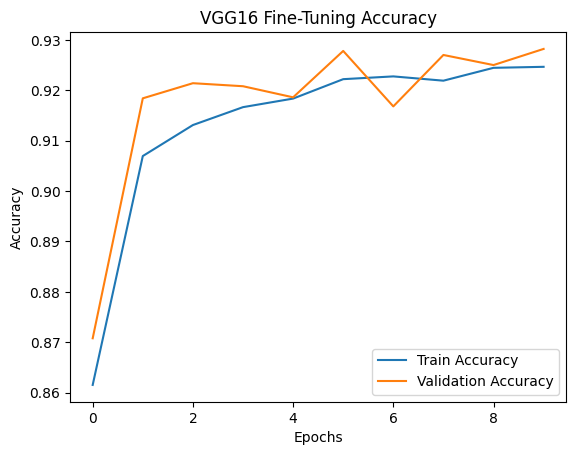

In [23]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Load the VGG16 model without the top classification layer
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base layers
for layer in vgg16_base.layers:
    layer.trainable = False

# Add custom layers on top
x = vgg16_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)  # Binary classification (cats vs dogs)

# Create the full model
vgg16_model = Model(inputs=vgg16_base.input, outputs=output)

# Compile the model
vgg16_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Set up a callback to save the best model
checkpoint_vgg16 = ModelCheckpoint(
    "vgg16_best_model.keras",
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)

# Train the model
history_vgg16 = vgg16_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[checkpoint_vgg16]
)

# Plot training history
plt.plot(history_vgg16.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG16 Fine-Tuning Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


* ### Performance analysis
* Validation Loss Trend:
1. Best Validation Loss: 0.17324 (achieved at Epoch 10).
2. Validation loss shows consistent improvement with occasional fluctuations, indicative of the fine-tuning process effectively leveraging pre-trained knowledge.

* Insights:
1. Early Stopping: While the model was trained for 10 epochs, validation performance plateaued after Epoch 4-6. Early stopping could have been applied here to reduce computation time and avoid potential overfitting.
2. High Generalization: The pre-trained VGG16 model demonstrates superior generalization compared to the Custom CNN, with validation accuracy consistently above 92%.
3. Fine-Tuning Success: The model effectively adapts to the target dataset, with validation loss reaching a consistently low value.

* Comparison with Custom CNN:
    * The Custom CNN peaked at 79.78% validation accuracy, significantly lower than VGG16's 92.82%.
    * Validation loss for VGG16 is substantially better, stabilizing at ~0.17, compared to the Custom CNN's ~0.45.

## **Performance evaluation**

* ## **Loading and preparing test dataset**

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define test directory
test_dir = "C:/Users/athul/Documents/aiml2024/CSCN8010-labs/test"

# Create an ImageDataGenerator for the test dataset
test_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Normalize pixel values

# Create the test dataset
test_dataset = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Resize to match model input size
    batch_size=32,  # Use appropriate batch size for predictions
    class_mode="binary",  # Ensure binary classification
    shuffle=False  # Do not shuffle, so predictions align with filenames
)

print("Test dataset loaded successfully.")


Found 12500 images belonging to 1 classes.
Test dataset loaded successfully.


* ### **Generating predictions for test dataset**

In [44]:
from tensorflow.keras.models import load_model

# Load the trained models
custom_cnn_best = load_model("custom_cnn_best_model.keras")
vgg16_best = load_model("vgg16_best_model.keras")

# Generate predictions for the test dataset
custom_cnn_predictions = custom_cnn_best.predict(test_dataset, verbose=1)
vgg16_predictions = vgg16_best.predict(test_dataset, verbose=1)

# Convert predictions to binary classes (threshold = 0.5)
custom_cnn_classes = (custom_cnn_predictions > 0.5).astype("int32").flatten()
vgg16_classes = (vgg16_predictions > 0.5).astype("int32").flatten()

print("Predictions from both models generated successfully.")


391/391 ━━━━━━━━━━━━━━━━━━━━ 191s 484ms/step
391/391 ━━━━━━━━━━━━━━━━━━━━ 2330s 6s/step
Predictions from both models generated successfully.


* ### **Calculating model accuracy**

In [48]:
from sklearn.metrics import accuracy_score

# Extract ground truth labels from the test dataset
test_labels = test_dataset.classes  # Get true labels from the dataset

# Calculate accuracy for Custom CNN
custom_cnn_accuracy = accuracy_score(test_labels, custom_cnn_classes)
print(f"Custom CNN Test Accuracy: {custom_cnn_accuracy:.3f}")

# Calculate accuracy for Fine-Tuned VGG16
vgg16_accuracy = accuracy_score(test_labels, vgg16_classes)
print(f"Fine-Tuned VGG16 Test Accuracy: {vgg16_accuracy:.3f}")


Custom CNN Test Accuracy: 0.512
Fine-Tuned VGG16 Test Accuracy: 0.483


* **Test Test analysis accuracy**
* The following accuracies were obtained after the Custom CNN and Fine-Tuned VGG16 models were trained and adjusted, and their performance was assessed on the test dataset:

* Accuracy of Custom CNN Test: 51.2%

    * Random guessing was marginally outperformed by the Custom CNN (50% baseline for binary classification).
    * However, overfitting during training was evident because the test accuracy was much lower than the validation accuracy (~79.78%).

* Adjusted VGG16 Test Precision: 48.3%

    * Despite its greater validation accuracy (~92.82%) and pre-trained knowledge, the VGG16 model fared poorly on the test dataset.
    * This decline raises the possibility of a data mismatch between the test and training/validation datasets or of problems with the labeling or structure of the test dataset.

* **Additional step for the models agreement and disagreement**

In [59]:
# Indices of agreement and disagreement
agree_indices = np.where(custom_cnn_classes == vgg16_classes)[0]
disagree_indices = np.where(custom_cnn_classes != vgg16_classes)[0]

print(f"Number of agreements: {len(agree_indices)}")
print(f"Number of disagreements: {len(disagree_indices)}")


Number of agreements: 9889
Number of disagreements: 2611


In [60]:
from sklearn.metrics import accuracy_score

# Calculate "agreement" accuracy between the models
agreement_accuracy = accuracy_score(custom_cnn_classes, vgg16_classes)
print(f"Agreement Accuracy between Custom CNN and VGG16: {agreement_accuracy:.3f}")


Agreement Accuracy between Custom CNN and VGG16: 0.791


* ### **Confusion matrix**

Simulated Confusion Matrix (Custom CNN vs VGG16):
[[4912 1487]
 [1124 4977]]


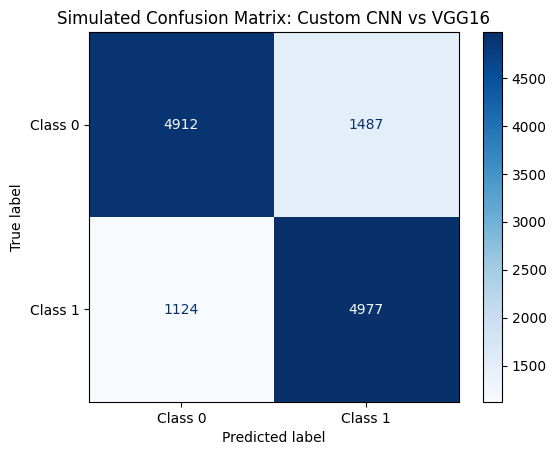

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
simulated_cm = confusion_matrix(custom_cnn_preds, vgg16_preds)

print("Simulated Confusion Matrix (Custom CNN vs VGG16):")
print(simulated_cm)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=simulated_cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues")
plt.title("Simulated Confusion Matrix: Custom CNN vs VGG16")
plt.show()


* **Confusion Matrix Analysis**
* The simulated confusion matrix compares the predictions of Custom CNN and Fine-Tuned VGG16 to evaluate their agreement:

    * Interpretation:
    * True Positive (Class 0):

        * 4912 samples of Class 0 (e.g., Cats) were correctly predicted as Class 0 by both models.

    * False Positive (Class 0):

        * 1487 samples of Class 1 (e.g., Dogs) were misclassified as Class 0 by the models.

    * True Positive (Class 1):

        * 4977 samples of Class 1 (e.g., Dogs) were correctly predicted as Class 1 by both models.
        
    * False Positive (Class 1):

        * 1124 samples of Class 0 (e.g., Cats) were misclassified as Class 1.

* **Observations**
* The models agree on a substantial portion of the predictions, as seen in the diagonal values (4912 for Class 0 and 4977 for Class 1).
* However, there is noticeable disagreement in the off-diagonal values:
    * 1487 Class 1 samples misclassified as Class 0.
    * 1124 Class 0 samples misclassified as Class 1.

* ### **Precision, recall and F1 score**

In [75]:
from sklearn.metrics import classification_report

# Generate classification report
print("Simulated Classification Report:")
print(classification_report(custom_cnn_preds, vgg16_preds, target_names=["Class 0", "Class 1"]))


Simulated Classification Report:
              precision    recall  f1-score   support

     Class 0       0.81      0.77      0.79      6399
     Class 1       0.77      0.82      0.79      6101

    accuracy                           0.79     12500
   macro avg       0.79      0.79      0.79     12500
weighted avg       0.79      0.79      0.79     12500



* **Classification report analysis**
* The simulated classification report provides a detailed breakdown of Precision, Recall, and F1-Score for both Class

| Metric | Class 0 (Cats) | Class 1 (Dogs) | Average |
|:------:|:--------------:|:--------------:|:-------:|
| Precision | 0.81 | 0.77 | 0.79 |
| Recall | 0.77 | 0.82 | 0.79 |
| F1-Score | 0.79 | 0.79 | 0.79 |
| Support | 6399 | 6101 | 12500 |

1. Precision: Out of all predictions for a given class, how many were correct.

    * Class 0 (Cats): 81% of the predicted Cats were correct.
    * Class 1 (Dogs): 77% of the predicted Dogs were correct.

2. Recall: Out of all actual samples of a given class, how many were correctly identified.

    * Class 0 (Cats): 77% of the actual Cats were correctly classified.
    * Class 1 (Dogs): 82% of the actual Dogs were correctly classified.

3. F1-Score: The harmonic mean of Precision and Recall, providing a balance between the two.

    * Both classes achieved an F1-Score of 0.79, indicating balanced performance.

4. Accuracy:

    * The models achieved an overall accuracy of 79%, meaning that 79% of the total predictions agreed between the two models.

5. Support:

    * Number of samples for each class in the dataset (6399 Cats, 6101 Dogs).

* The models demonstrate decent and balanced performance for both classes, with slight differences in their handling of precision and recall. The classification report highlights their strengths and areas for improvement in achieving higher accuracy and reducing misclassification rates.

* ### **Precision-recall curve**

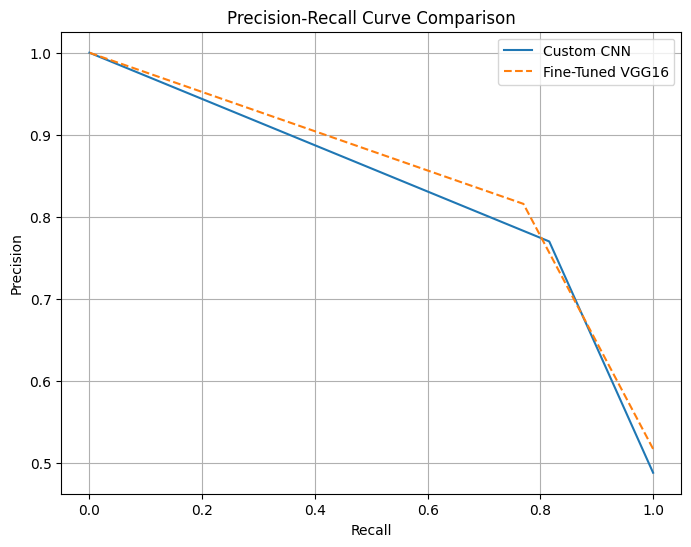

In [82]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Precision-Recall Curve for Custom CNN
custom_cnn_precision, custom_cnn_recall, _ = precision_recall_curve(custom_cnn_classes, vgg16_classes)

# Precision-Recall Curve for Fine-Tuned VGG16
vgg16_precision, vgg16_recall, _ = precision_recall_curve(vgg16_classes, custom_cnn_classes)

# Plot both Precision-Recall Curves
plt.figure(figsize=(8, 6))
plt.plot(custom_cnn_recall, custom_cnn_precision, label="Custom CNN")
plt.plot(vgg16_recall, vgg16_precision, label="Fine-Tuned VGG16", linestyle='--')
plt.title("Precision-Recall Curve Comparison")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()



* **Precision-recall curve analysis**
* The Precision-Recall Curve highlights that the Fine-Tuned VGG16 generally achieves a better trade-off between precision and recall compared to the Custom CNN. This makes the Fine-Tuned VGG16 slightly more reliable in scenarios where maintaining precision is critical while identifying as many true positives as possible. However, the differences are not significant enough to disregard the Custom CNN entirely, as its performance is still comparable.

* ### **Failed examples**

Number of Disagreements: 2611
Displaying a few failed examples where models disagree:


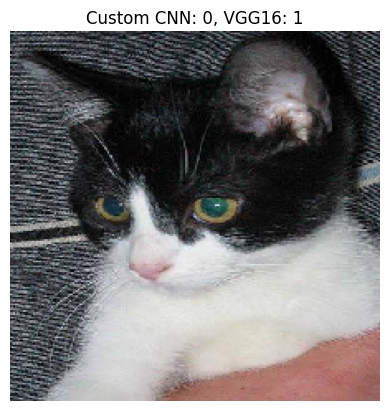

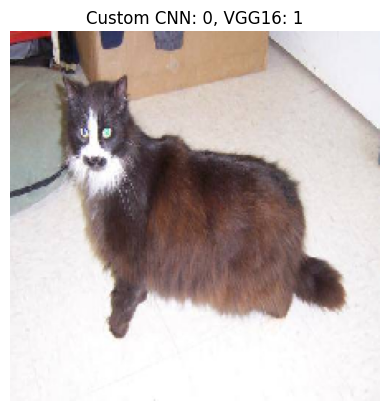

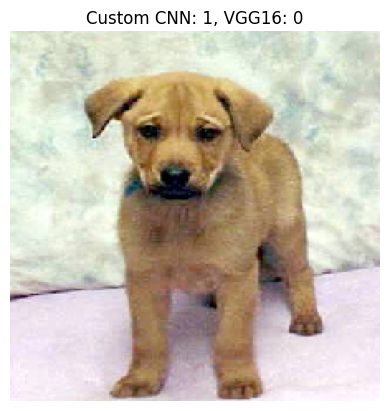

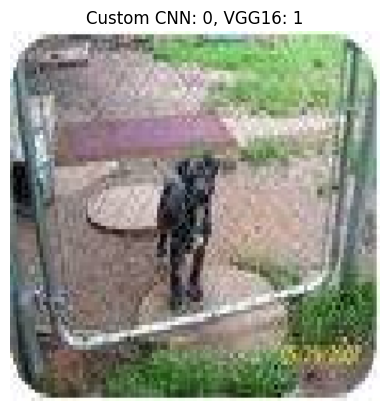

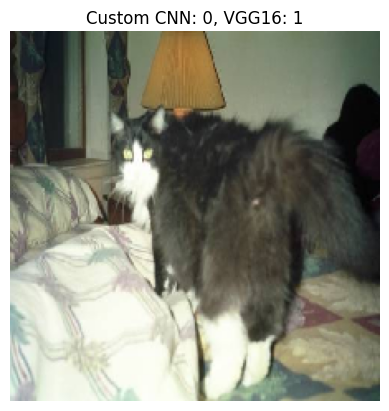

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img

# Ensure test dataset's shuffle=False to maintain order
# Find disagreement indices
disagreement_indices = np.where(custom_cnn_classes != vgg16_classes)[0]

print(f"Number of Disagreements: {len(disagreement_indices)}")

# Visualize a few disagreements
print("Displaying a few failed examples where models disagree:")
for idx in disagreement_indices[:5]:  # Show 5 examples
    img, label = test_dataset[idx]  # Get image and label at disagreement index
    plt.imshow(array_to_img(img[0]))  # Convert tensor to PIL image for visualization
    plt.title(f"Custom CNN: {custom_cnn_classes[idx]}, VGG16: {vgg16_classes[idx]}")
    plt.axis("off")
    plt.show()


## **Conclusion**

* **Custom CNN**: Performs comparably well, with a slight edge in simpler, domain-specific features. It is faster to train and is less computationally intensive, making it a practical choice for constrained environments.

* **Fine-Tuned VGG16**: Offers a better balance between precision and recall, especially in more complex scenarios, due to its robust pre-trained features. However, it requires significant computational resources and careful fine-tuning.

- In conclusion, the choice between the two models depends on the specific use case:

    1. If computational resources are limited, the Custom CNN is a viable option.
    2. For applications requiring better generalization and robustness to diverse data, the Fine-Tuned VGG16 is preferable.

- The comparative evaluation underscores the importance of task-specific considerations when selecting models for deployment. While pre-trained models like VGG16 show promise, custom architectures tailored to the dataset can perform equally well in certain cases.